# CO543 - Image Processing
## Lab 02

- E/19/129
- K. H. Gunawardana


In [1]:
# import modules
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def showImg(I):
    plt.figure(figsize=(10, 8))
    plt.imshow(I, cmap='gray')
    plt.title('Image')
    plt.show()

def show2Img(A, B):
    plt.figure(figsize=(10, 8)) 
    plt.subplot(121),plt.imshow(A, cmap='gray'),plt.title('Input')
    plt.subplot(122),plt.imshow(B, cmap='gray'),plt.title('Output')
    plt.show()

def show2ImgWithDetails(A, x, B, y):
    plt.figure(figsize=(10, 8)) 
    plt.subplot(121),plt.imshow(A, cmap='gray'),plt.title(x)
    plt.subplot(122),plt.imshow(B, cmap='gray'),plt.title(y)
    plt.show()

def viewImg(A):
    cv2.imshow('image',A)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

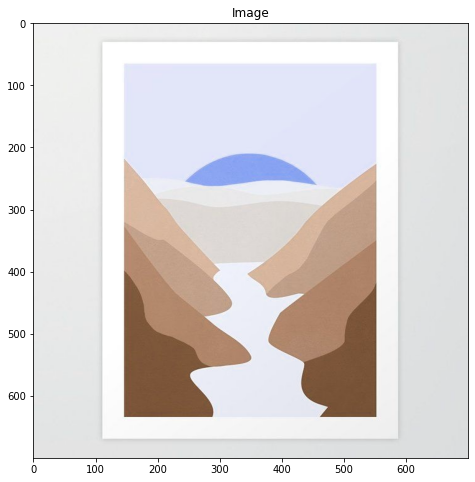

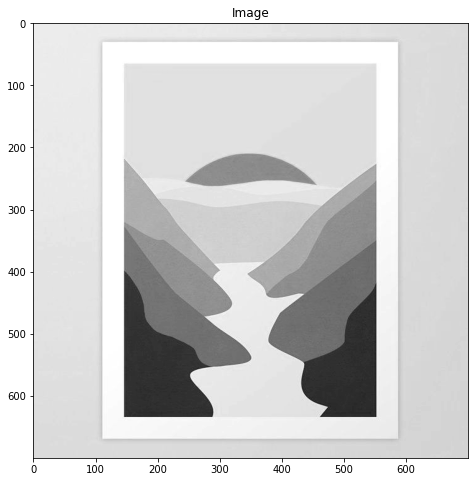

In [3]:
img = cv2.imread("img.jpg")
imgGray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
showImg(img)
showImg(imgGray)

##### Task 01

In [4]:
# function for thresholding for Gray Image
def thresholding(I, value):
    # Create a new image with the same size as the input image
    nwImg = I.copy()

    # Thresholding: Set pixels with intensity >= threshold value to 255 (white) and others to 0 (black)
    nwImg[I >= value] = 255
    nwImg[I < value] = 0

    return nwImg



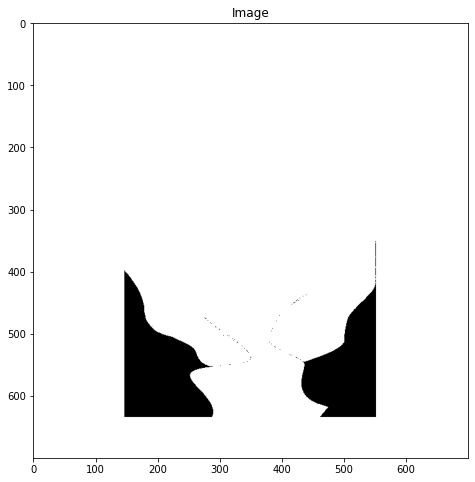

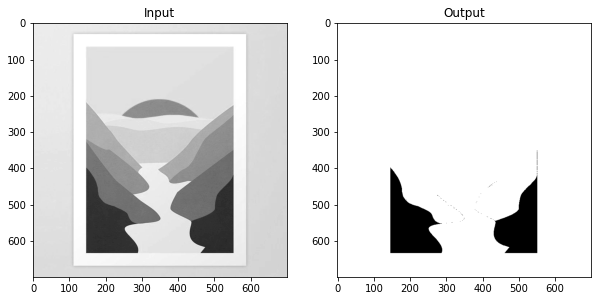

In [5]:

thresImg = thresholding(imgGray, 127)
showImg(thresImg)
show2Img(imgGray, thresImg)

##### Task 02

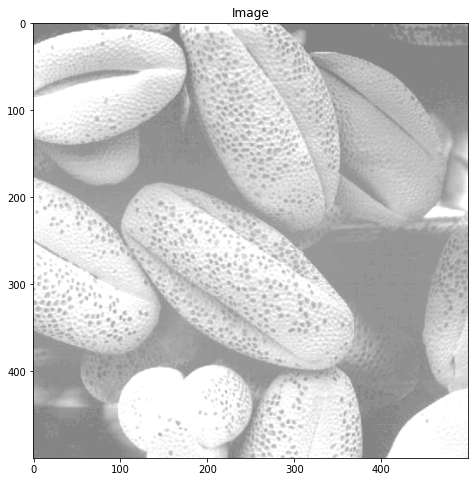

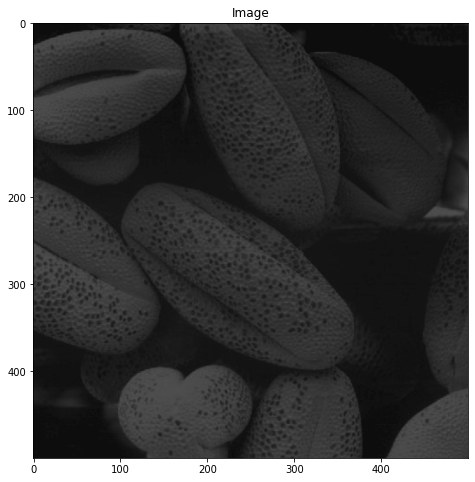

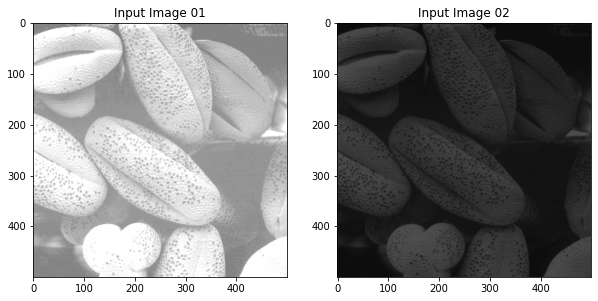

In [6]:
img1 = cv2.imread("bright.tif")
img2 = cv2.imread("dark.tif")

showImg(img1)
showImg(img2)

show2ImgWithDetails(img1, "Input Image 01", img2, "Input Image 02")

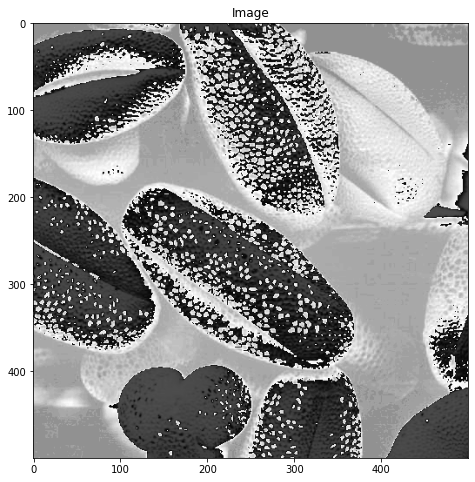

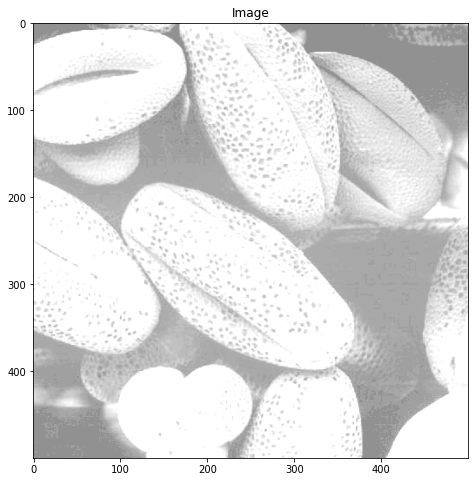

In [7]:
addImgNp = img1 + img2
showImg(addImgNp)

addImgCv = cv2.add(img1, img2)
showImg(addImgCv)

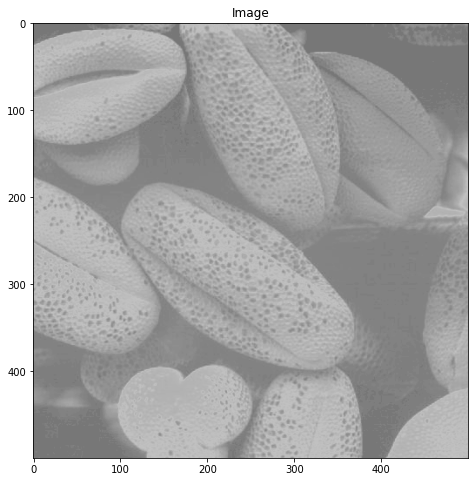

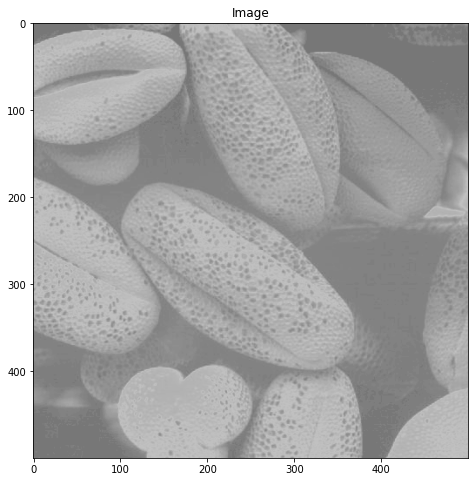

In [8]:
subImgNp = img1 - img2
showImg(subImgNp)

subImgCv = cv2.subtract(img1, img2)
showImg(subImgCv)

##### Task 03

In [9]:
# a. Log transformation
def log_transformation(image):
    result = np.log1p(image).astype(np.uint8)
    return result

# b. Power transformation
def power_transformation(image, gamma):
    result = np.power(image, gamma)
    return result.astype(np.uint8)

import numpy as np

# Function for Contrast Stretching Transformation
def contrast_stretching(image, r1, s1, r2, s2):
    
    imgCp = np.copy(image)

    # Create boolean masks for different ranges
    mask1 = image < r1
    mask2 = (r1 <= image) & (image <= r2)
    mask3 = image > r2

    # Apply contrast stretching transformation using boolean masks
    imgCp[mask1] = s1 * image[mask1] / r1
    imgCp[mask2] = ((s2 - s1) / (r2 - r1)) * (image[mask2] - r1) + s1
    imgCp[mask3] = ((255 - s2) / (255 - r2)) * (image[mask3] - r2) + s2

    return imgCp

# d. Gray level slicing
def gray_level_slicing(image, lower, upper):
    result = np.copy(image)
    result[(image > lower) & (image < upper)] = 255
    return result.astype(np.uint8)

# e. Bit plane slicing
def bit_plane_slicing(image, bit_plane):
    result = (image >> bit_plane) & 1
    return (result * 255).astype(np.uint8)

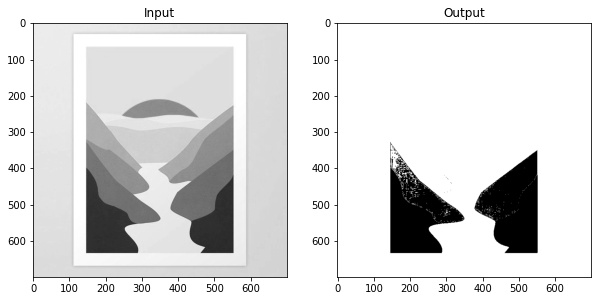

In [10]:
imgLog = log_transformation(imgGray)
show2Img(imgGray, imgLog)

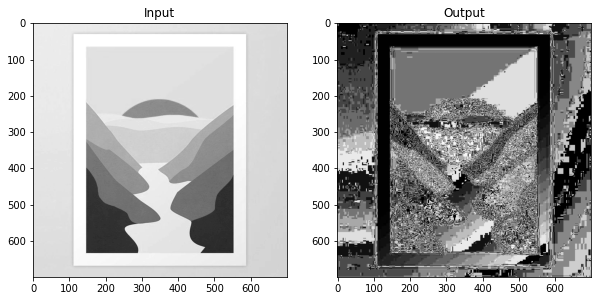

In [11]:
imgPow = power_transformation(imgGray, 2)
show2Img(imgGray, imgPow)

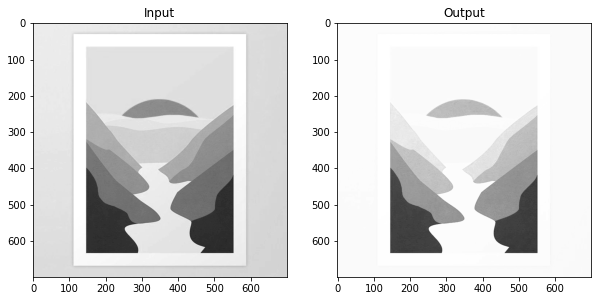

In [12]:
imgCon = contrast_stretching(imgGray, 50, 100, 200, 250)
show2Img(imgGray, imgCon)

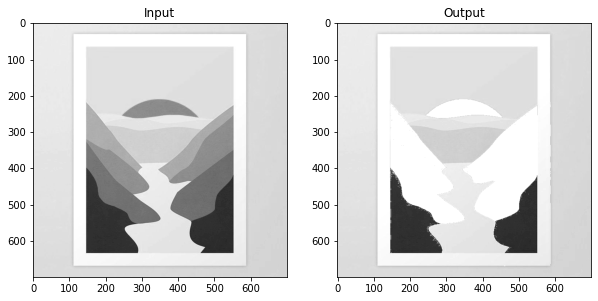

In [13]:
imgGrayLevelSlicing = gray_level_slicing(imgGray, 100, 200)
show2Img(imgGray, imgGrayLevelSlicing)

In [14]:
imgList = [imgGray]
titles = ["Input Image"]  # Titles for each image

for i in range(8):
    titles.append('Bit Plane ' + str(i))  # Titles for each image
    imgList.append(bit_plane_slicing(imgGray, i))


In [15]:
def plot_images(img_list, titles, rows, cols, fig_width=20, fig_height=16):

    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height))

    for i, ax in enumerate(axes.flat):
        ax.imshow(img_list[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

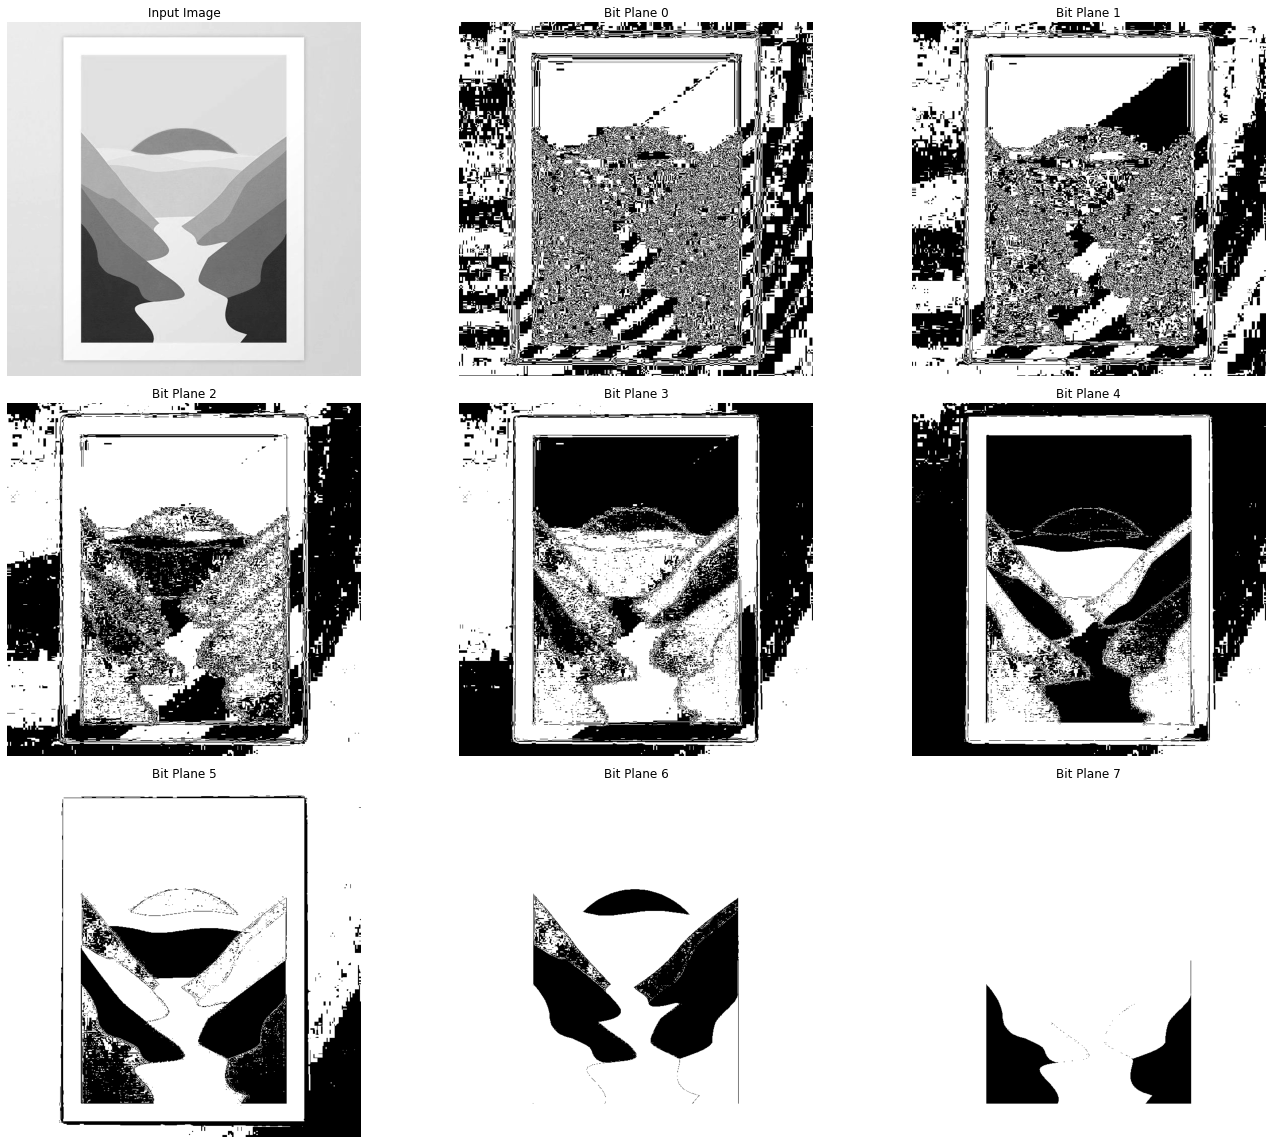

In [16]:
# Plot all images in a 3x3 grid
plot_images(imgList, titles, rows=3, cols=3)

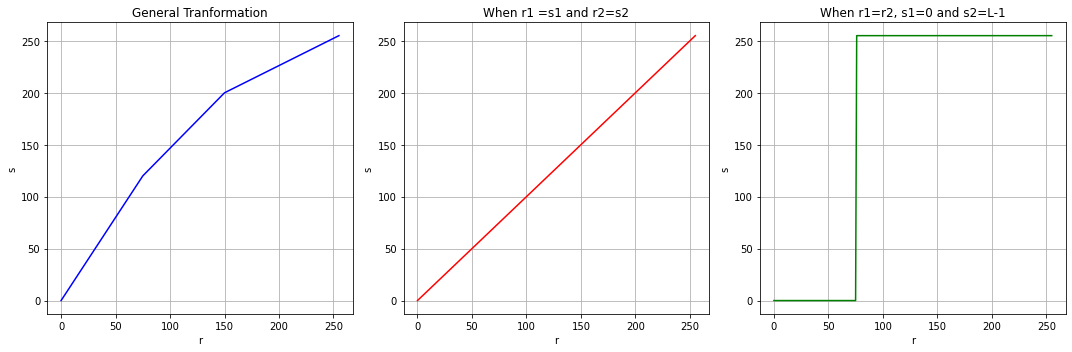

In [17]:
# Function for Contrast Stretching Transformation
def contrast_stretching_pixel(pixel_value, r1, s1, r2, s2):
    if pixel_value < r1:
        return s1 * pixel_value / r1
    elif r1 <= pixel_value <= r2:

        if r1 == r2:
            return 0

        return ((s2 - s1) / (r2 - r1)) * (pixel_value - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pixel_value - r2) + s2

# Define the parameters
r1 = 75
s1 = 120
r2 = 150
s2 = 200

# Generate the input pixel values
pixel_values = np.arange(256)

# Calculate the output pixel values using Contrast Stretching Transformation
output_values_a = [contrast_stretching_pixel(pixel_value, r1, s1, r2, s2) for pixel_value in pixel_values]
output_values_b = [contrast_stretching_pixel(pixel_value, r1, r1, r2, r2) for pixel_value in pixel_values]
output_values_c = [contrast_stretching_pixel(pixel_value, r1, 0, r1, 255) for pixel_value in pixel_values]

# Plot the transformation functions
plt.figure(figsize=(15, 5))

# Plot for case a
plt.subplot(1, 3, 1)
plt.plot(pixel_values, output_values_a, color='blue')
plt.title('General Tranformation')
plt.xlabel('r')
plt.ylabel('s')
plt.grid()

# Plot for case b
plt.subplot(1, 3, 2)
plt.plot(pixel_values, output_values_b, color='red')
plt.title('When r1 =s1 and r2=s2')
plt.xlabel('r')
plt.ylabel('s')
plt.grid()

# Plot for case c
plt.subplot(1, 3, 3)
plt.plot(pixel_values, output_values_c, color='green')
plt.title('When r1=r2, s1=0 and s2=L-1')
plt.xlabel('r')
plt.ylabel('s')
plt.grid()

plt.tight_layout()
plt.show()


##### Lab Task 04

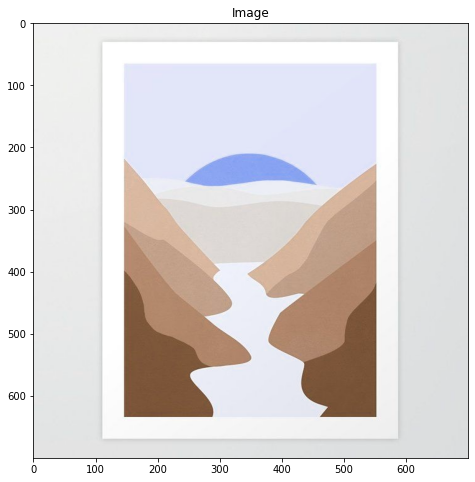

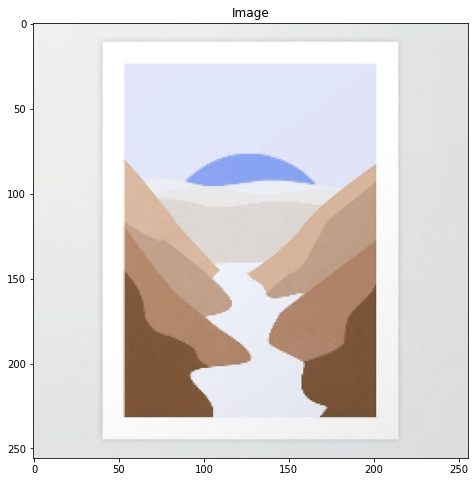

In [18]:
image = cv2.imread("img.jpg")
showImg(image)

imgResized = cv2.resize(img, (256, 256))
showImg(imgResized)


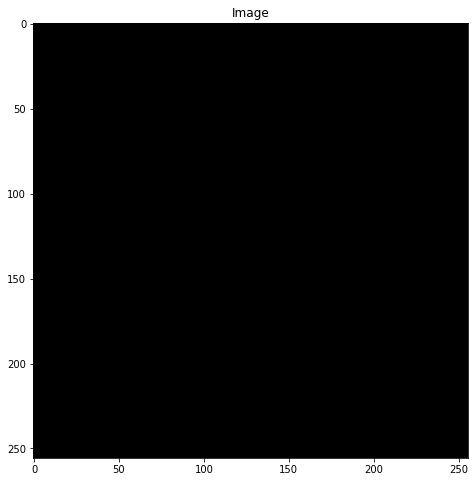

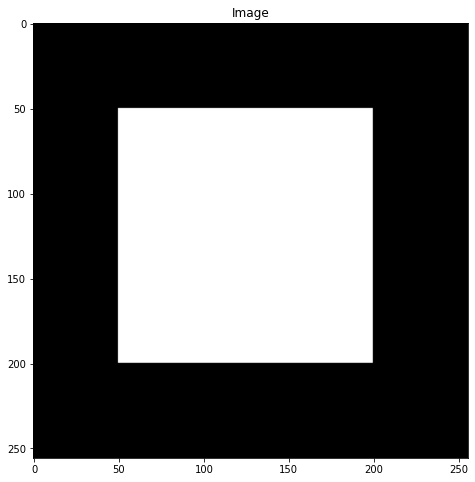

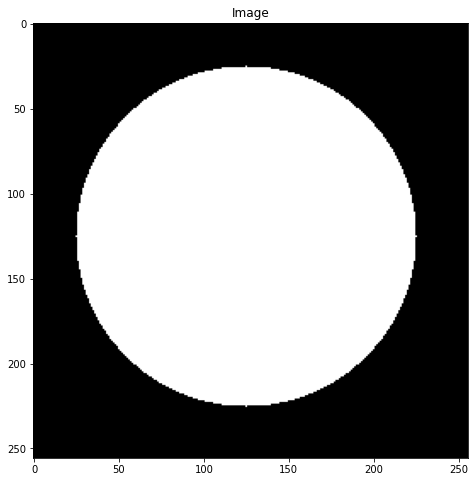

In [19]:
# mask square para
x1 = 50
y1 = 50
x2 = 200
y2 = 200

# mask cicular
x = 125
y = 125
r = 100

# create mask
mask = np.zeros((256, 256)).astype(np.uint8)
showImg(mask)

maskSquare = np.copy(mask)
maskSquare[x1:x2, y1:y2] = 255
showImg(maskSquare)

maskCicular = cv2.circle(mask, (x,y), r, (255,255,255), -1)
showImg(maskCicular)


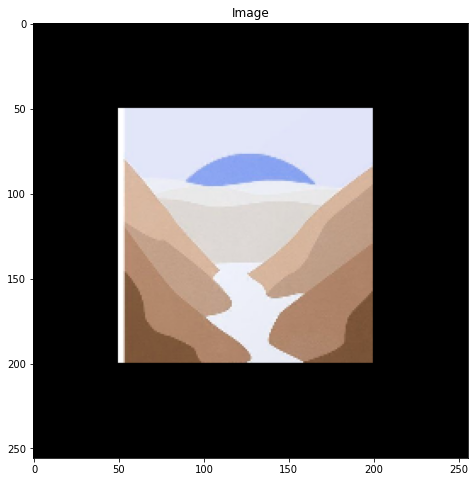

In [20]:
image_sqaure = cv2.bitwise_and(imgResized,imgResized,mask = maskSquare)
showImg(image_sqaure)

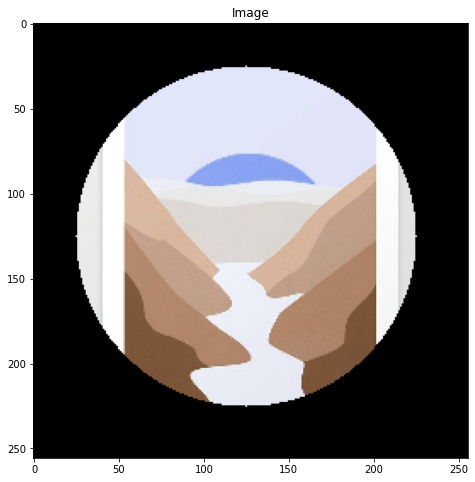

In [21]:
image_cicular = cv2.bitwise_and(imgResized,imgResized,mask = maskCicular)
showImg(image_cicular)

##### Lab Task 05 

In [22]:
def addBrightness(image, brightness):
    # Convert the image to float32 for arithmetic operations
    image_float = image.astype(float)
    
    # Add the brightness value to each pixel
    brightened_image = image_float + brightness
    
    # Clip the pixel values
    brightened_image = np.clip(brightened_image, 0, 255)
    
    # Convert the brightened image back to uint8 datatype
    brightened_image = brightened_image.astype(np.uint8)
    
    return brightened_image

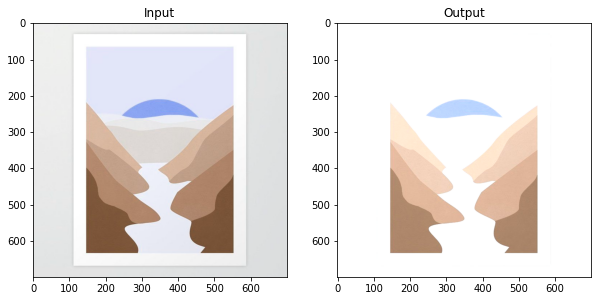

In [23]:
imgBrighter = addBrightness(img, 50)
show2Img(img, imgBrighter)

##### Lab Task 06

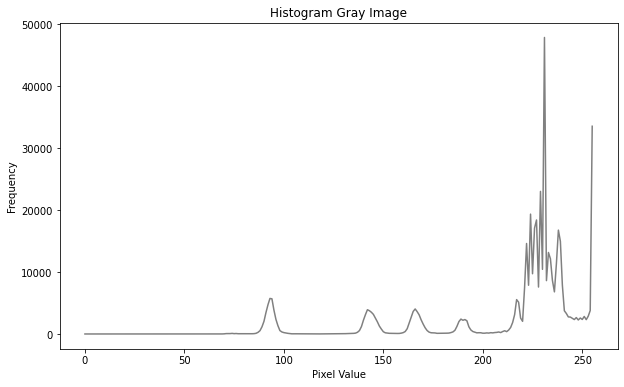

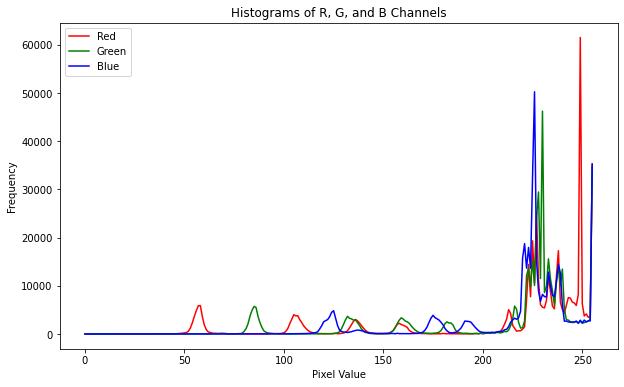

In [24]:
# Calculate histogram using cv2.calcHist()
hist = cv2.calcHist([imgGray], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.plot(hist, color='gray')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram Gray Image')
plt.show()

# Split the image into its R, G, and B channels
b, g, r = cv2.split(img)

# Calculate the histograms for each channel using cv2.calcHist()
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histograms of R, G, and B Channels')
plt.legend()
plt.show()


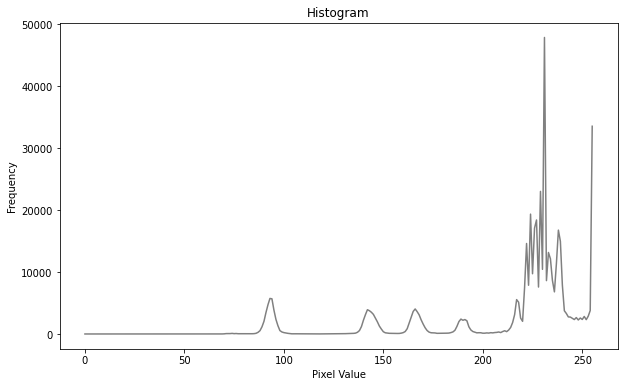

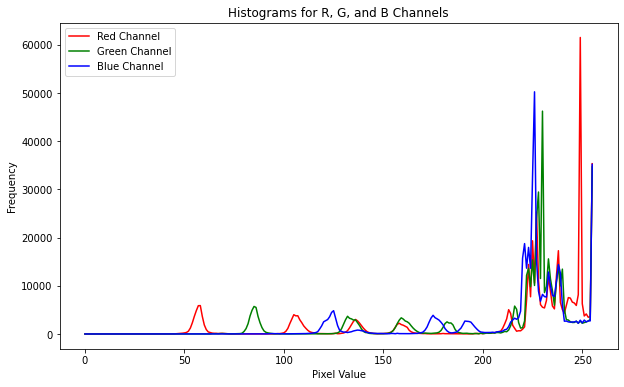

In [25]:
# Flatten the image into a 1D array
pixels = imgGray.flatten()

# Calculate the histogram using np.histogram()
hist, bins = np.histogram(pixels, bins=256, range=(0, 256))

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.plot(hist, color='gray')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

b, g, r = cv2.split(img)

# Calculate histograms for each channel using np.histogram()
hist_r, bins_r = np.histogram(r.flatten(), bins=256, range=[0,256])
hist_g, bins_g = np.histogram(g.flatten(), bins=256, range=[0,256])
hist_b, bins_b = np.histogram(b.flatten(), bins=256, range=[0,256])

# Plot the histograms
plt.figure(figsize=(10, 6))

plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')

plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histograms for R, G, and B Channels')
plt.legend()

plt.show()

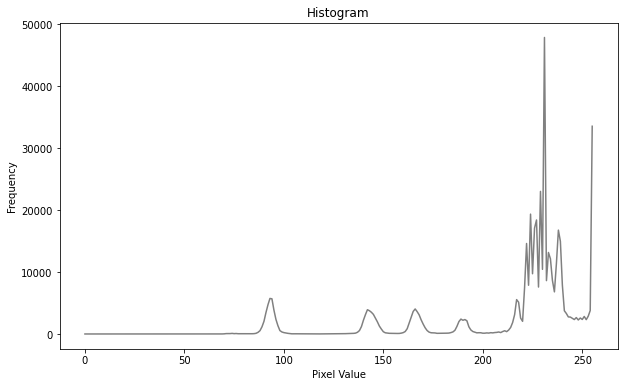

In [26]:
# Flatten the image into a 1D array
pixels = imgGray.flatten()
unique, counts = np.unique(pixels, return_counts=True)

histData = np.zeros(256)

histData[unique] = counts

plt.figure(figsize=(10, 6))
plt.plot(histData, color='gray')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


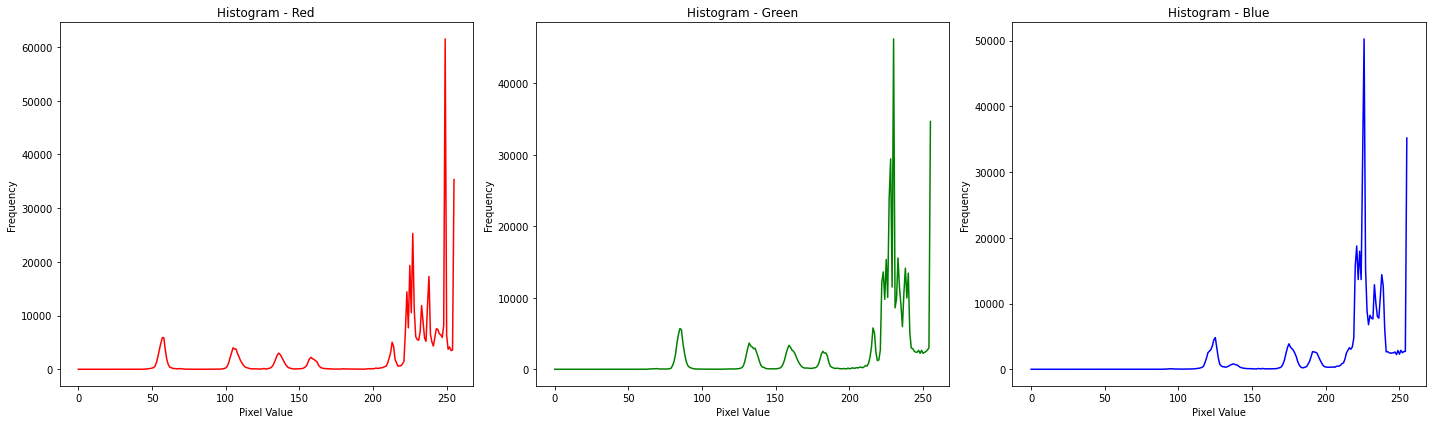

In [27]:
# Flatten the image into a 1D array
b, g, r = cv2.split(img)

# Flatten the R channel into a 1D array
pixelsB = b.flatten()
uniqueB, countsB = np.unique(pixelsB, return_counts=True)

histDataB = np.zeros(256)
histDataB[uniqueB] = countsB

# Flatten the R channel into a 1D array
pixelsR = r.flatten()
uniqueR, countsR = np.unique(pixelsR, return_counts=True)

histDataR = np.zeros(256)
histDataR[uniqueR] = countsR

# Flatten the G channel into a 1D array
pixelsG = g.flatten()
uniqueG, countsG = np.unique(pixelsG, return_counts=True)

histDataG = np.zeros(256)
histDataG[uniqueG] = countsG

# Plot the histograms for R, G, and B channels
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.plot(histDataR, color='red')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram - Red')

plt.subplot(132)
plt.plot(histDataG, color='green')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram - Green')

plt.subplot(133)
plt.plot(histDataB, color='blue')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram - Blue')

plt.tight_layout()
plt.show()



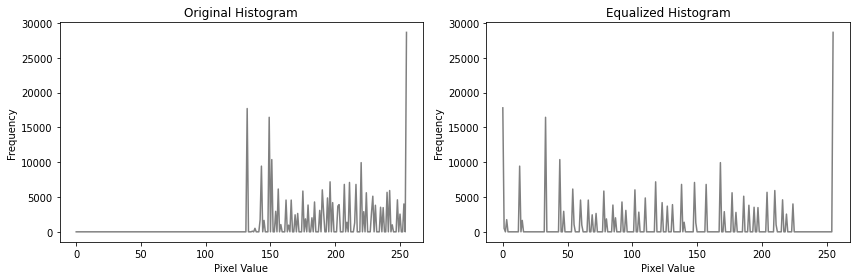

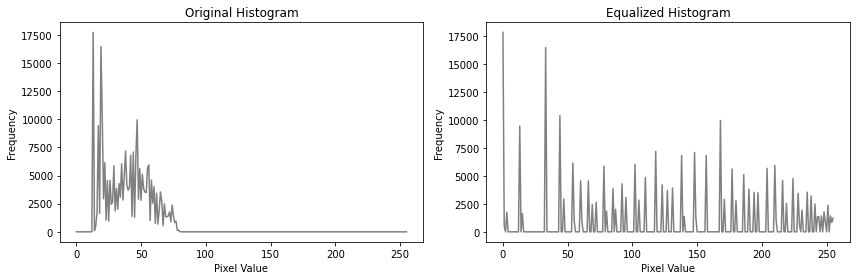

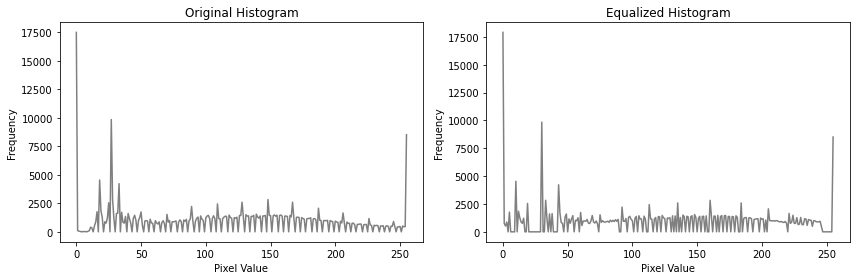

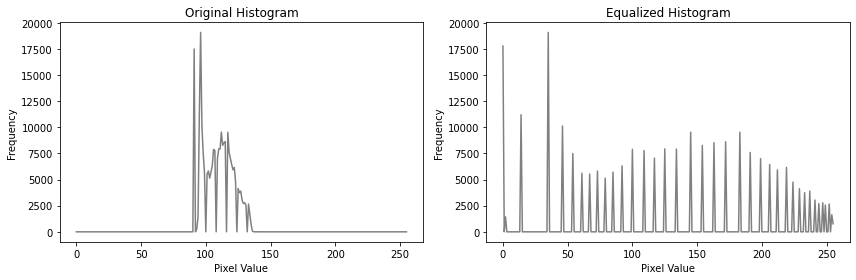

In [28]:
from matplotlib import pyplot as plt

# Function to display images
def show_images_cv2(window_name, img1, img2):
    
    concatenated_img = np.hstack((img1, img2))
    cv2.imshow(window_name, concatenated_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Function to plot histogram
def plot_histogram(img, title):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist, color='gray')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title(title)

# Function to perform histogram equalization
def histogram_equalization(img):
    equ = cv2.equalizeHist(img)
    return equ

# Load and process each image
images = ['bright.tif', 'dark.tif', 'high_contrast.tif', 'low_contrast.tif']
for image_path in images:
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    equ = histogram_equalization(img)

    # Show original and equalized images
    show_images_cv2('Original vs Equalized Image', img, equ)

    # Plot original histogram
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plot_histogram(img, 'Original Histogram')

    # Plot equalized histogram
    plt.subplot(1, 2, 2)
    plot_histogram(equ, 'Equalized Histogram')

    plt.tight_layout()
    plt.show


### END